#USELESS

In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [2]:
mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [3]:
trainS = mat_data["C"][0][0]

In [ ]:
trainS = torch.tensor(trainS)

In [ ]:
type(trainS)

numpy.ndarray

In [4]:
trainData = []

In [5]:
for i in range(trainS.shape[1]-9):
    segment = trainS[:,i:i+10]
    flatt = segment.flatten(order='F')
    trainData.append(flatt)

trainMatrix = np.array(trainData).T

In [6]:
trainMatrix.shape

(1010, 5948)

In [7]:
trainMatrix = torch.tensor(trainMatrix)

In [8]:
m, k1, k2, k3 = 1010, 200, 50, 10
net = Neural_NMF([m, k1, k2, k3])

In [9]:
history = train(net, trainMatrix, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [04:40<00:00, 28.01s/it]


In [10]:
A = history[0][2]
S = history[1][2]

In [11]:
A.shape

torch.Size([50, 10])

In [12]:
S.shape

torch.Size([10, 5948])

In [13]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

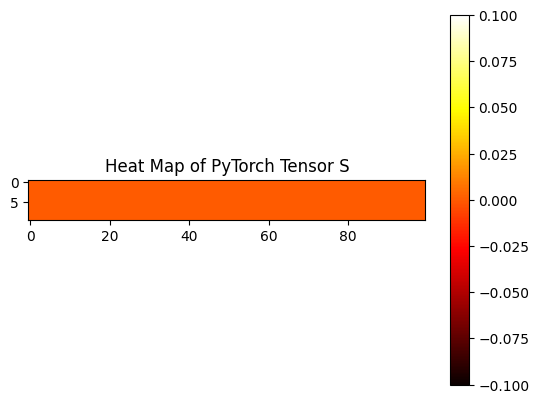

In [17]:
i = 3118
plt.imshow(S1[:,i:i+100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

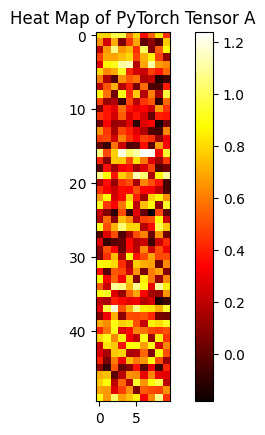

In [ ]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()